---

## **<font color="Dodgerblue"> Modelación Climática Tropical</font>**
### **<font color="crimson"> Mapas de las tendencias con regresión lineal para la precipitación en JJAS con SPEAR todos los miembros </font>**


---

In [2]:
pip install xarray

  Using cached xarray-2025.4.0-py3-none-any.whl.metadata (12 kB)
Using cached xarray-2025.4.0-py3-none-any.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install cftime

  Using cached cftime-1.6.4.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.7 kB)
Using cached cftime-1.6.4.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install h5netcdf

  Using cached h5netcdf-1.6.1-py3-none-any.whl.metadata (13 kB)
  Using cached h5py-3.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
Using cached h5netcdf-1.6.1-py3-none-any.whl (49 kB)
Using cached h5py-3.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install netCDF4 

  Using cached netCDF4-1.7.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.8 kB)
Using cached netCDF4-1.7.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install h5py netCDF4 h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install cartopy

  Using cached Cartopy-0.24.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.9 kB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl.metadata (55 kB)
Using cached Cartopy-0.24.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
from cartopy.util import add_cyclic_point
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import matplotlib.ticker as ticker
import glob

In [10]:
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=10)

In [11]:
def mapa_MC(data, levels, ccmap, titulo, extend='max', cbarlabel='pr  [mm day$^{-1}$]', 
            limite_NS=75, lon_min=None, lon_max=None, lat_min=None, lat_max=None):
    lons, lats = data.lon, data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    fig = plt.figure(figsize=(12, 11))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    cs = ax.contourf(lon, lats, data, levels=levels, cmap=ccmap, extend=extend, transform=ccrs.PlateCarree())

    # Definimos la extensión del mapa
    if lon_min is not None and lon_max is not None and lat_min is not None and lat_max is not None:
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    else:
        ax.set_extent([0, 359.1, -limite_NS, limite_NS], crs=ccrs.PlateCarree())

    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='k', linewidth=0.5)
    gl.top_labels = gl.right_labels = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    plt.title(titulo, fontsize=22)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    # agregar colorbar
    cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.046, pad=0.06)
    cbar.ax.xaxis.label.set_size(18)  
    cbar.ax.tick_params(labelsize=17)  
    cbar.ax.set_xlabel(cbarlabel)

In [12]:
#generar automaticamente la lista de archivos sin tener que escribirlos, los ordena
file_list = np.sort(glob.glob("/home/jovyan/ModClim/SPEAR/monthly*ens*.nc"))
print(file_list)

['/home/jovyan/ModClim/SPEAR/monthly_ens001.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens002.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens003.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens004.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens005.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens006.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens007.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens008.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens009.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens010.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens011.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens012.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens013.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens014.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens015.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens016.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens017.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens018.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens019.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens020.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens

In [13]:
# hacemos una funcion para el coef. de regresión
def reg_coef(X,y):
    m=np.sum((X - np.mean(X)) * (y - np.mean(y))) / np.sum((X - np.mean(X))**2)
    b = np.mean(y) - m * np.mean(X)
    return m,b

In [14]:
# almacenar archivos
ens_dlist = []

# Ciclo para cada miembro
for i, filename in enumerate(file_list):
    ds = xr.open_dataset(filename)
    pr = ds['precip'] * 86400  
    pr['units'] = 'mm day-1'

    # Selección de JJAS en periodo reciente
    pr_years=pr.sel(time=slice('1980', '2010'))
    pr_jjas = pr_years.where((pr.time.dt.month >= 6) & (pr.time.dt.month <= 9), drop=True)

    area_ens = pr_jjas.sel(lat=slice(10.25, 33.25), lon=slice(241.5625, 275.9375))

    mean_annual = area_ens.groupby('time.year').mean(dim='time')

    years = mean_annual['year'].values
    coef_matriz_m = np.zeros((len(area_ens.lat), len(area_ens.lon)))

    for i, lat in enumerate(area_ens.lat):
        for j, lon in enumerate(area_ens.lon):
            y = mean_annual.sel(lat=lat, lon=lon).values
            X = years
            m, _ = reg_coef(X, y)
            coef_matriz_m[i, j] = m


    # Guardar matriz de coeficientes
    coef_ds = xr.Dataset(
        {"regression_coeff": (["lat", "lon"], coef_matriz_m)},
        coords={"lat": area_ens.lat, "lon": area_ens.lon}
    )
    
    output_file = f"coef_regresion_1980_ens_{filename.split('_')[-1].split('.')[0]}.nc"
    coef_ds.to_netcdf(output_file)
    print(f"Guardado: {output_file}")

Guardado: coef_regresion_1980_ens_ens001.nc
Guardado: coef_regresion_1980_ens_ens002.nc
Guardado: coef_regresion_1980_ens_ens003.nc
Guardado: coef_regresion_1980_ens_ens004.nc
Guardado: coef_regresion_1980_ens_ens005.nc
Guardado: coef_regresion_1980_ens_ens006.nc
Guardado: coef_regresion_1980_ens_ens007.nc
Guardado: coef_regresion_1980_ens_ens008.nc
Guardado: coef_regresion_1980_ens_ens009.nc
Guardado: coef_regresion_1980_ens_ens010.nc
Guardado: coef_regresion_1980_ens_ens011.nc
Guardado: coef_regresion_1980_ens_ens012.nc
Guardado: coef_regresion_1980_ens_ens013.nc
Guardado: coef_regresion_1980_ens_ens014.nc
Guardado: coef_regresion_1980_ens_ens015.nc
Guardado: coef_regresion_1980_ens_ens016.nc
Guardado: coef_regresion_1980_ens_ens017.nc
Guardado: coef_regresion_1980_ens_ens018.nc
Guardado: coef_regresion_1980_ens_ens019.nc
Guardado: coef_regresion_1980_ens_ens020.nc
Guardado: coef_regresion_1980_ens_ens021.nc
Guardado: coef_regresion_1980_ens_ens022.nc
Guardado: coef_regresion_1980_en

In [50]:
# almacenando los archivos
ens_dlist = []

# Ciclo para cada miembro
for i, filename in enumerate(file_list[:3]):
    # Open the dataset
    ds = xr.open_dataset(filename)
    pr = ds['precip'] * 86400  
    pr['units'] = 'mm day-1'

    # Selección de verano en periodo completo
    pr_years=pr.sel(time=slice('1921', '2010'))
    pr_jjas = pr_years.where((pr.time.dt.month >= 6) & (pr.time.dt.month <= 9), drop=True)

    area_ens = pr_jjas.sel(lat=slice(10.25, 33.25), lon=slice(241.5625, 275.9375))

    mean_annual = area_ens.groupby('time.year').mean(dim='time')

    years = mean_annual['year'].values
    coef_matriz_m = np.zeros((len(area_ens.lat), len(area_ens.lon)))

    for i, lat in enumerate(area_ens.lat):
        for j, lon in enumerate(area_ens.lon):
            y = mean_annual.sel(lat=lat, lon=lon).values
            X = years
            m, _ = reg_coef(X, y)
            coef_matriz_m[i, j] = m

In [46]:
# Leemos los archivos netcdf de coeficientes de regresión en los 80s
coef_files = np.sort(glob.glob("coef_regresion_1980_ens_*.nc"))

# Seleccionar solo los primeros tres archivos o todos
coef_files = coef_files

# Lista para almacenarlos
coef_list = []

for file in coef_files:
    ds = xr.open_dataset(file)
    coef_list.append(ds['regression_coeff'])

coef_ens = xr.concat(coef_list, dim="ens")

# Calcular el promedio del ensamble
coef_promedio = coef_ens.mean(dim="ens")

# Guardamos el promedio en un NetCDF
#coef_promedio.to_netcdf("coef_regresion_spear_ens_mean_80_allens.nc")
print("Guardado coef_regresion_spear_ens_mean_p80.nc")

Guardado coef_regresion_spear_ens_mean_p80.nc


In [42]:
# Leemos todos los archivos periodo completo
coef_files = np.sort(glob.glob("coef_regresion_1921_ens_*.nc"))

# Seleccionar solo los primeros tres archivos o todos
coef_files = coef_files

# Lista para almacenarlos
coef_list = []

for file in coef_files:
    ds = xr.open_dataset(file)
    coef_list.append(ds['regression_coeff'])

coef_ens_all = xr.concat(coef_list, dim="ens")
coef_promedio_ens_all = coef_ens_all.mean(dim="ens")
#coef_promedio_ens_all.to_netcdf("coef_regresion_spear_ens_mean_21_allens.nc")

In [43]:
coef_promedio_1921 = xr.open_dataset("coef_regresion_spear_ens_mean_21_allens.nc")['regression_coeff']
#coef_promedio_1921 = xr.open_dataset("coef_regresion_spear_ens_mean_p21.nc")['regression_coeff']
coef_promedio_1921

<xarray.DataArray 'regression_coeff' (lat: 47, lon: 56)> Size: 21kB
[2632 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 376B 10.25 10.75 11.25 11.75 ... 32.25 32.75 33.25
    units    <U8 32B ...
  * lon      (lon) float64 448B 241.6 242.2 242.8 243.4 ... 274.7 275.3 275.9

In [20]:
coef_promedio_1980 = xr.open_dataset("coef_regresion_spear_ens_mean_80_allens.nc")['regression_coeff']
#coef_promedio_1980 = xr.open_dataset("coef_regresion_spear_ens_mean_p80.nc")['regression_coeff']
coef_promedio_1980

<xarray.DataArray 'regression_coeff' (lat: 47, lon: 56)> Size: 21kB
[2632 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 376B 10.25 10.75 11.25 11.75 ... 32.25 32.75 33.25
    units    <U8 32B ...
  * lon      (lon) float64 448B 241.6 242.2 242.8 243.4 ... 274.7 275.3 275.9

In [21]:
random_ens=np.random.randint(0,30,4)
levels = np.arange(-3, 3.1, 0.25) 

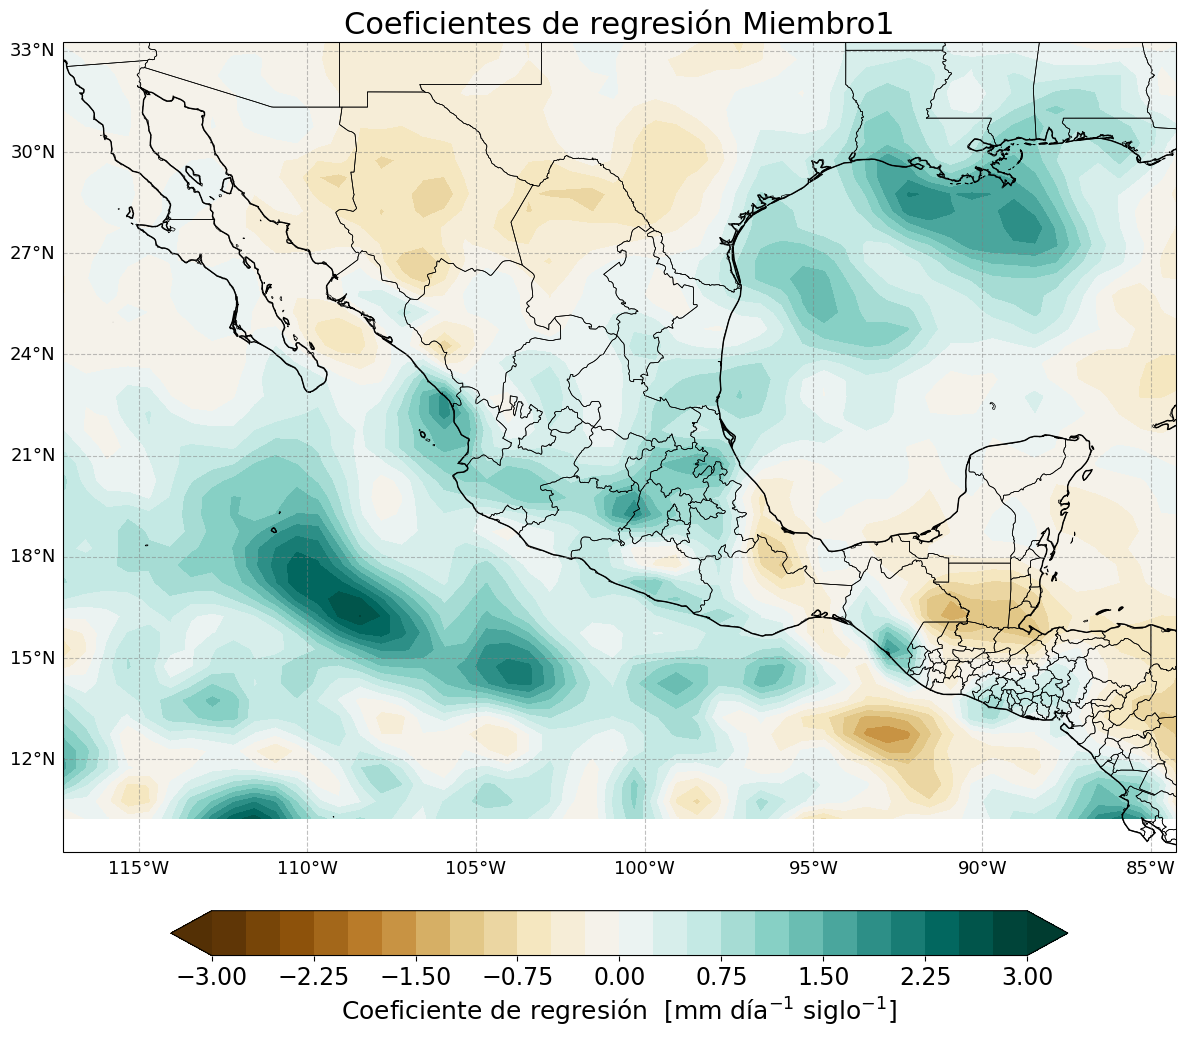

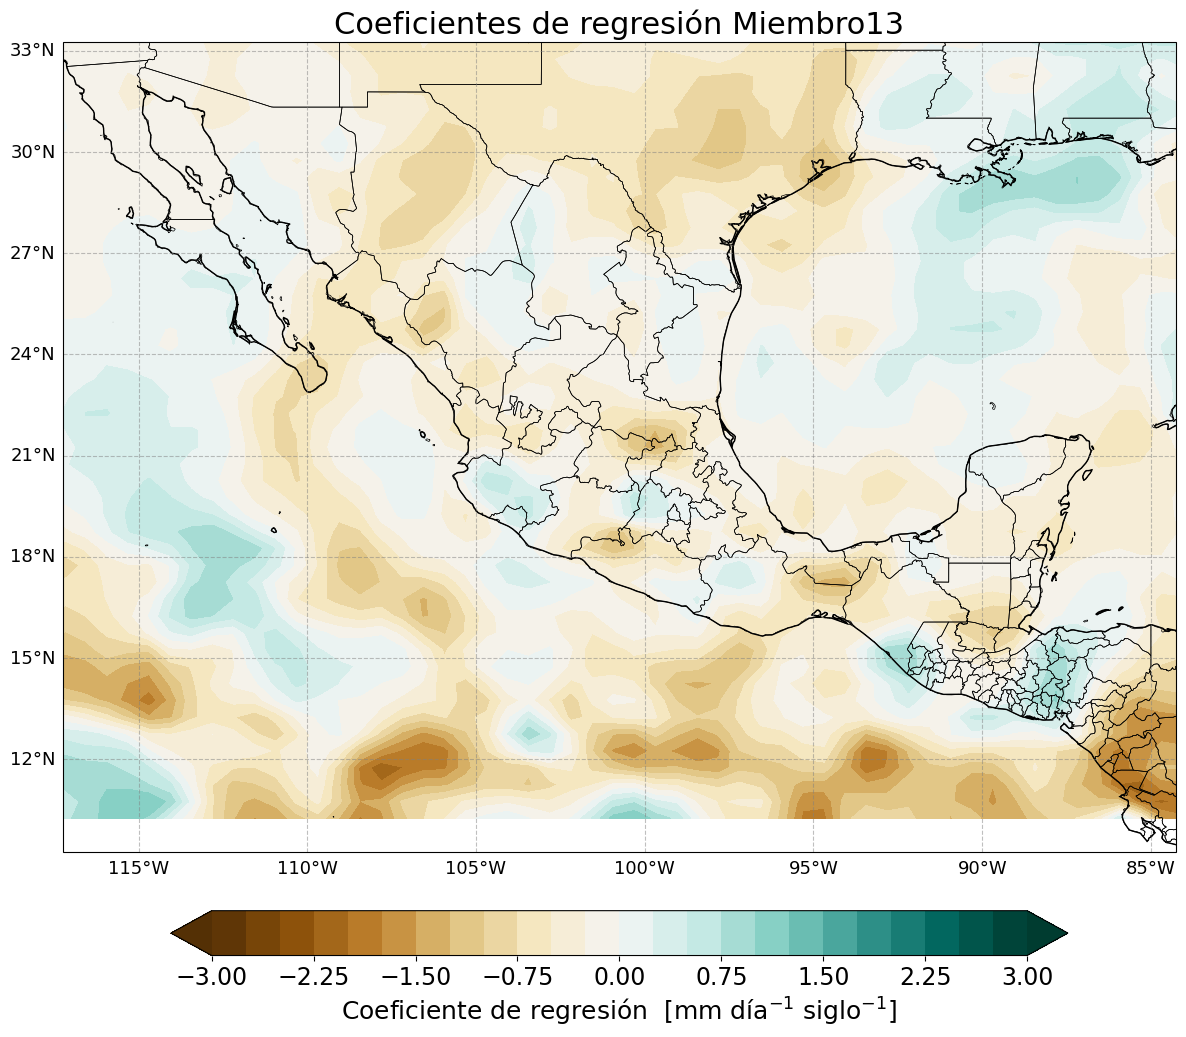

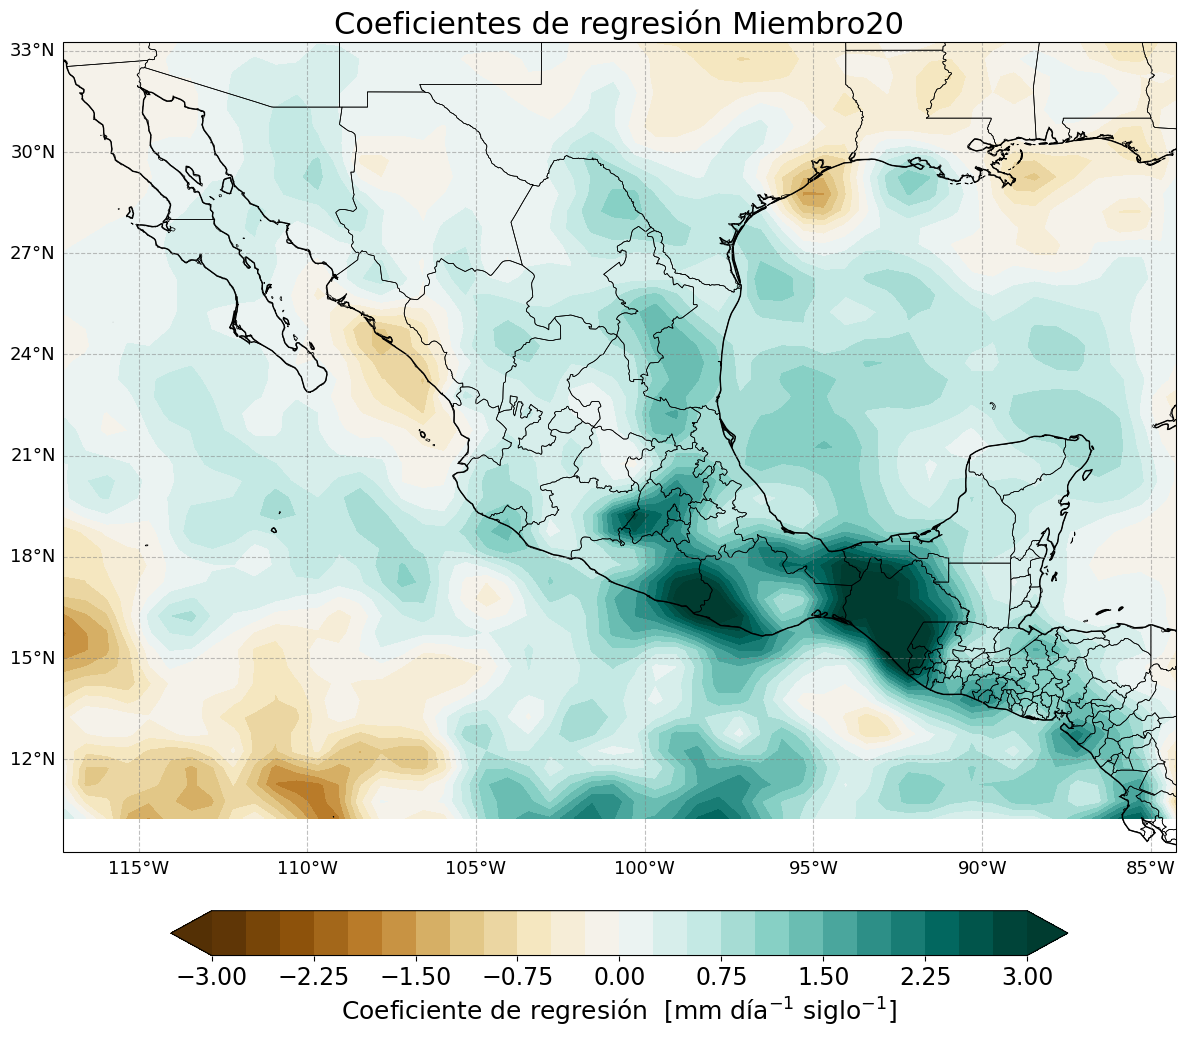

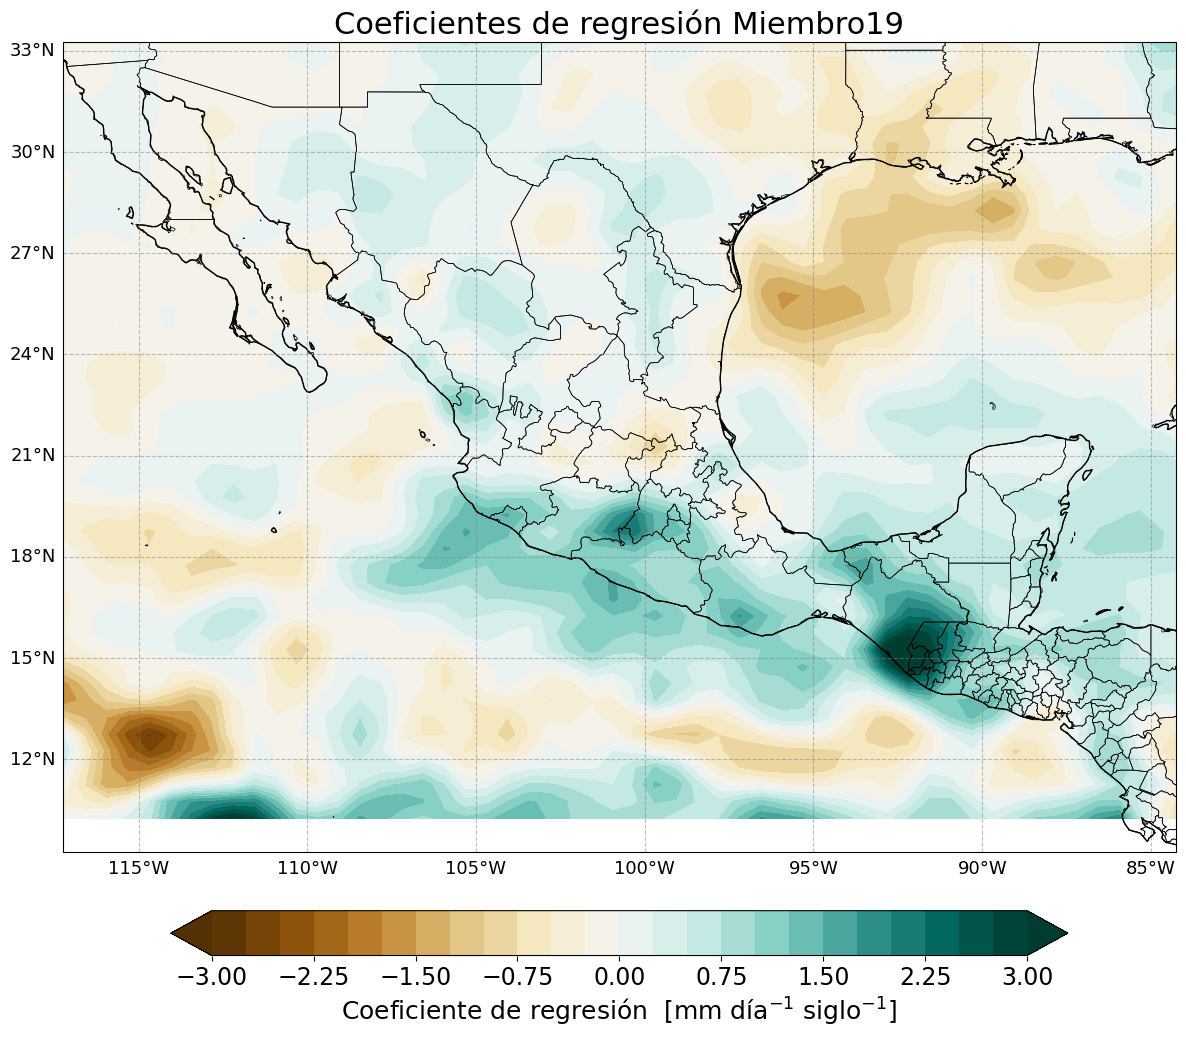

In [22]:
for ii,ij in enumerate(random_ens):
    # Graficamos la matriz 
    #plt.subplot(321+ii)
    coef_ens=coef_ens_all.sel(ens=ij)
    mapa_MC(coef_ens*100, levels, 'BrBG', 'Coeficientes de regresión Miembro'+str(ij), 
            extend='both', cbarlabel='Coeficiente de regresión  [mm día$^{-1}$ siglo$^{-1}$]', lon_min=242.75, lon_max=275.75, lat_min=9.25, lat_max=33.25)

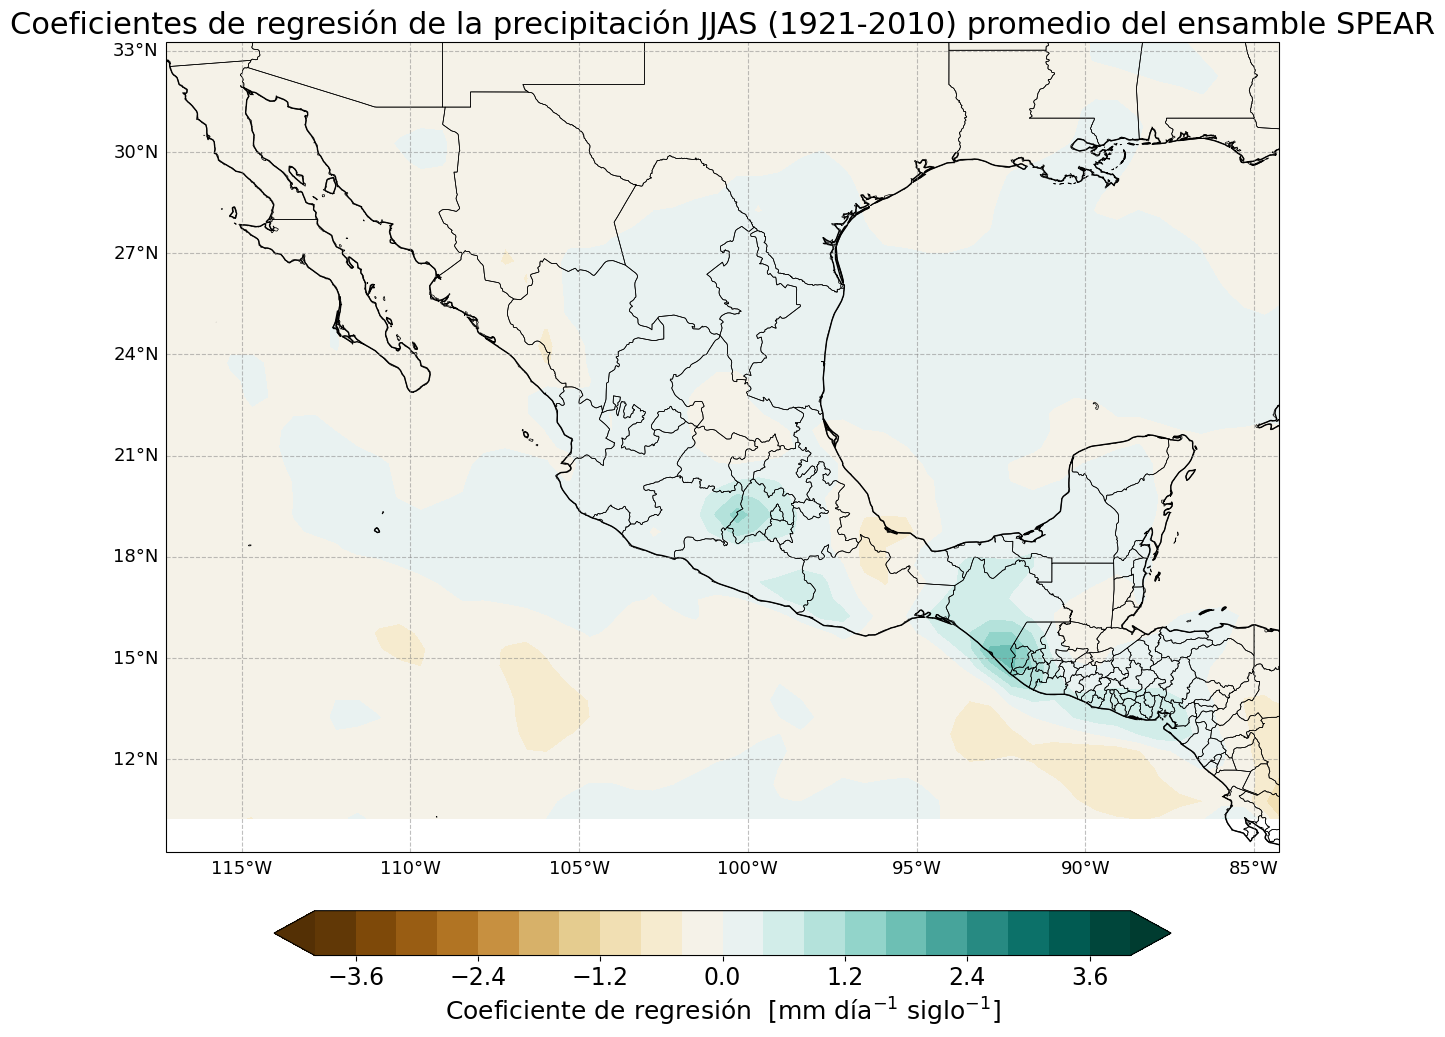

In [49]:
# Graficamos la matriz 
levels = np.linspace(-4, 4, 21) 

mapa_MC(coef_promedio_ens_all*100, levels, 'BrBG', 'Coeficientes de regresión de la precipitación JJAS (1921-2010) promedio del ensamble SPEAR', 
        extend='both', cbarlabel='Coeficiente de regresión  [mm día$^{-1}$ siglo$^{-1}$]', lon_min=242.75, lon_max=275.75, lat_min=9.25, lat_max=33.25)

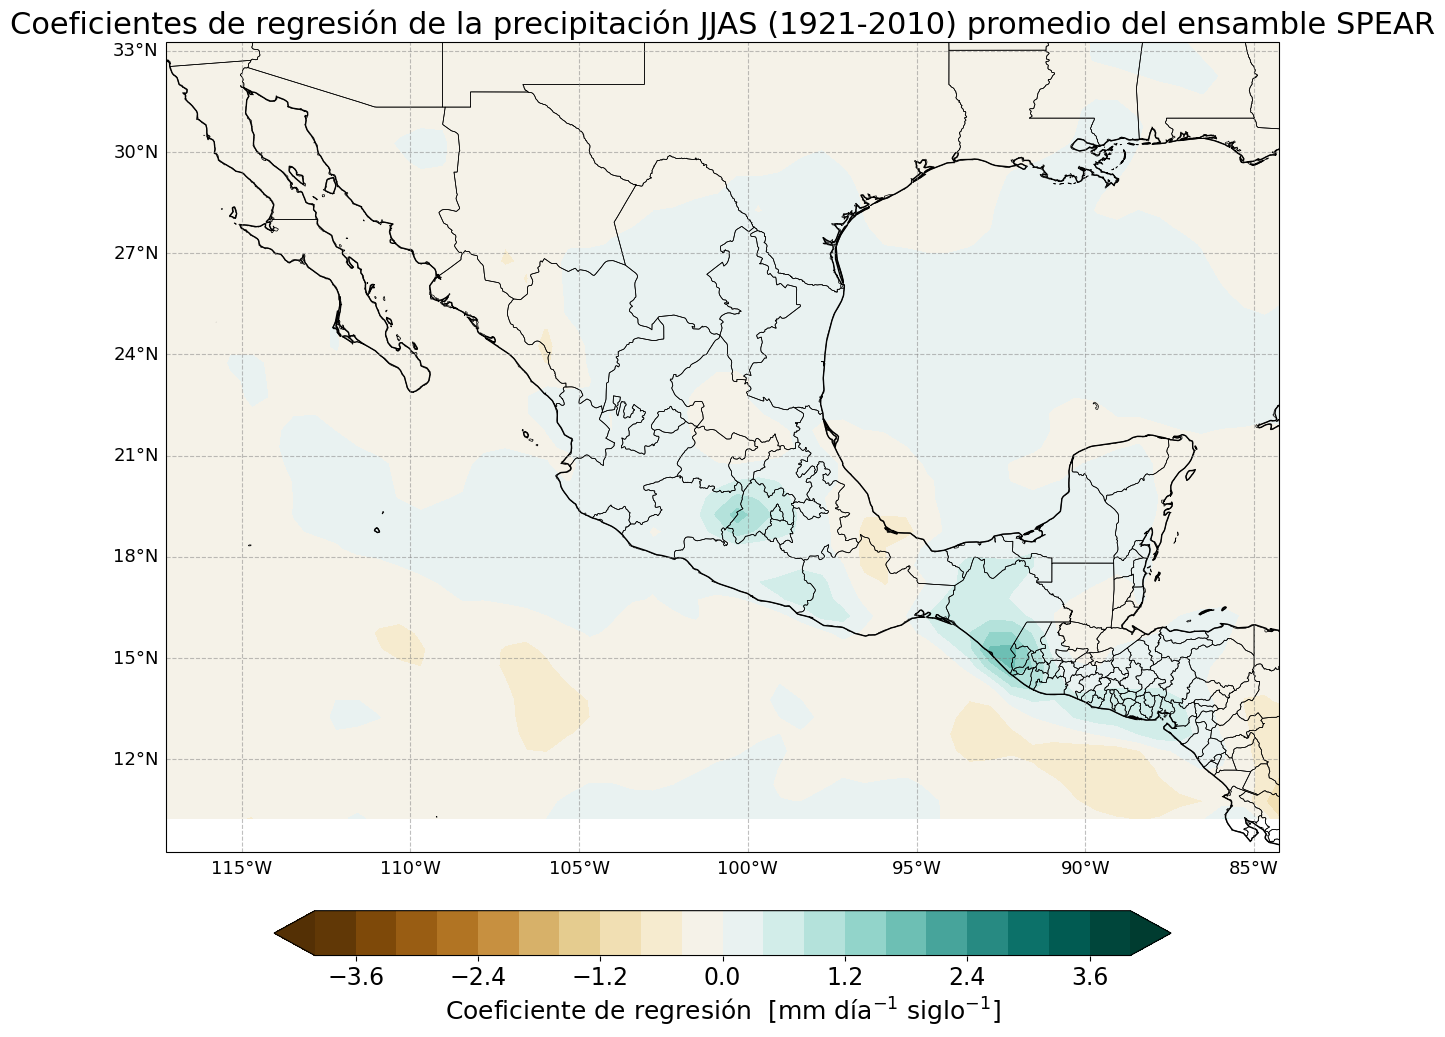

In [45]:
# Graficamos la matriz 
levels = np.linspace(-4, 4, 21) 

mapa_MC(coef_promedio_1921*100, levels, 'BrBG', 'Coeficientes de regresión de la precipitación JJAS (1921-2010) promedio del ensamble SPEAR', 
        extend='both', cbarlabel='Coeficiente de regresión  [mm día$^{-1}$ siglo$^{-1}$]', lon_min=242.75, lon_max=275.75, lat_min=9.25, lat_max=33.25)

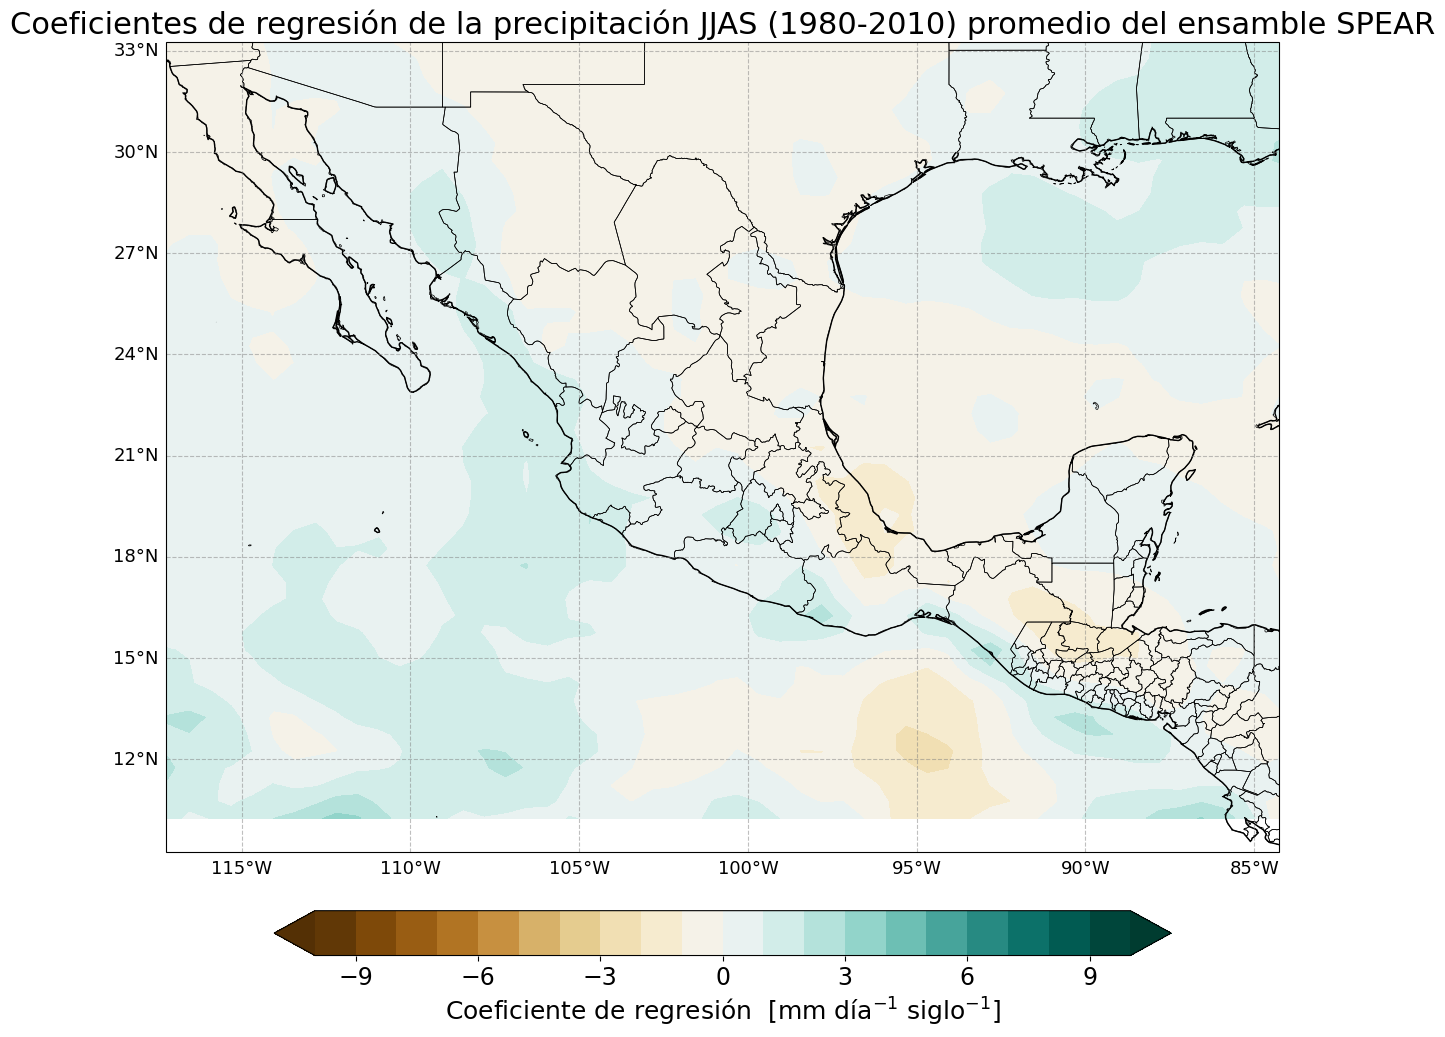

In [24]:
levels = np.linspace(-10, 10, 21) 

# Graficamos la matriz 
mapa_MC(coef_promedio*100, levels, 'BrBG', 'Coeficientes de regresión de la precipitación JJAS (1980-2010) promedio del ensamble SPEAR', 
        extend='both', cbarlabel='Coeficiente de regresión  [mm día$^{-1}$ siglo$^{-1}$]', lon_min=242.75, lon_max=275.75, lat_min=9.25, lat_max=33.25)

In [25]:
mean_precipitation_ensemble = mean_annual.mean(dim=['lat', 'lon']).values
mean_precipitation_ensemble
#np.save('mean_trend_ensemble_21s.npy', mean_precipitation_ensemble)

array([5.271358 , 5.082085 , 4.6826744, 5.2879524, 5.7144685, 4.5840178,
       5.2545424, 6.1446776, 5.238036 , 5.163721 , 5.2905636, 5.3562827,
       5.3359966, 4.726921 , 4.679239 , 4.5259776, 5.592883 , 5.0445333,
       5.0691557, 5.7134247, 4.6530857, 6.233609 , 4.806659 , 5.0026474,
       5.772799 , 5.9271703, 5.1633253, 4.7745132, 5.2473383, 5.2325025,
       4.654147 , 5.325469 , 5.620404 , 5.408881 , 4.964317 , 4.9125986,
       5.197445 , 5.9777226, 5.363025 , 4.8316975, 5.3739057, 5.622704 ,
       5.6670313, 5.315219 , 4.564209 , 5.256989 , 5.229341 , 5.219648 ,
       5.3737106, 4.751958 , 4.3549232, 5.3431745, 5.5642   , 5.5007715,
       4.582708 , 4.9726043, 5.158095 , 4.3914413, 4.412011 , 5.286082 ,
       5.0107813, 4.6648326, 5.069143 , 5.3038177, 4.5932455, 4.927377 ,
       5.321876 , 5.9026556, 4.48926  , 5.4575915, 5.678794 , 4.840263 ,
       5.224626 , 5.8070874, 4.6428347, 4.8230557, 3.9531717, 4.653609 ,
       5.348833 , 5.60353  , 4.955973 , 4.8470483, 

In [26]:
years = mean_annual['year'].values
years

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010])

In [27]:
#mean_precipitation_ensemble = np.load('mean_trend_ensemble_80s.npy')

In [28]:
# Serie de tiempo
X = years
y = mean_precipitation_ensemble

# Calculo de la pendiente (m) y la intersección (b)
m = np.sum((X - np.mean(X)) * (y - np.mean(y))) / np.sum((X - np.mean(X))**2)
b = np.mean(y) - m * np.mean(X)

# Calcular las predicciones 
predicciones = b + m * X

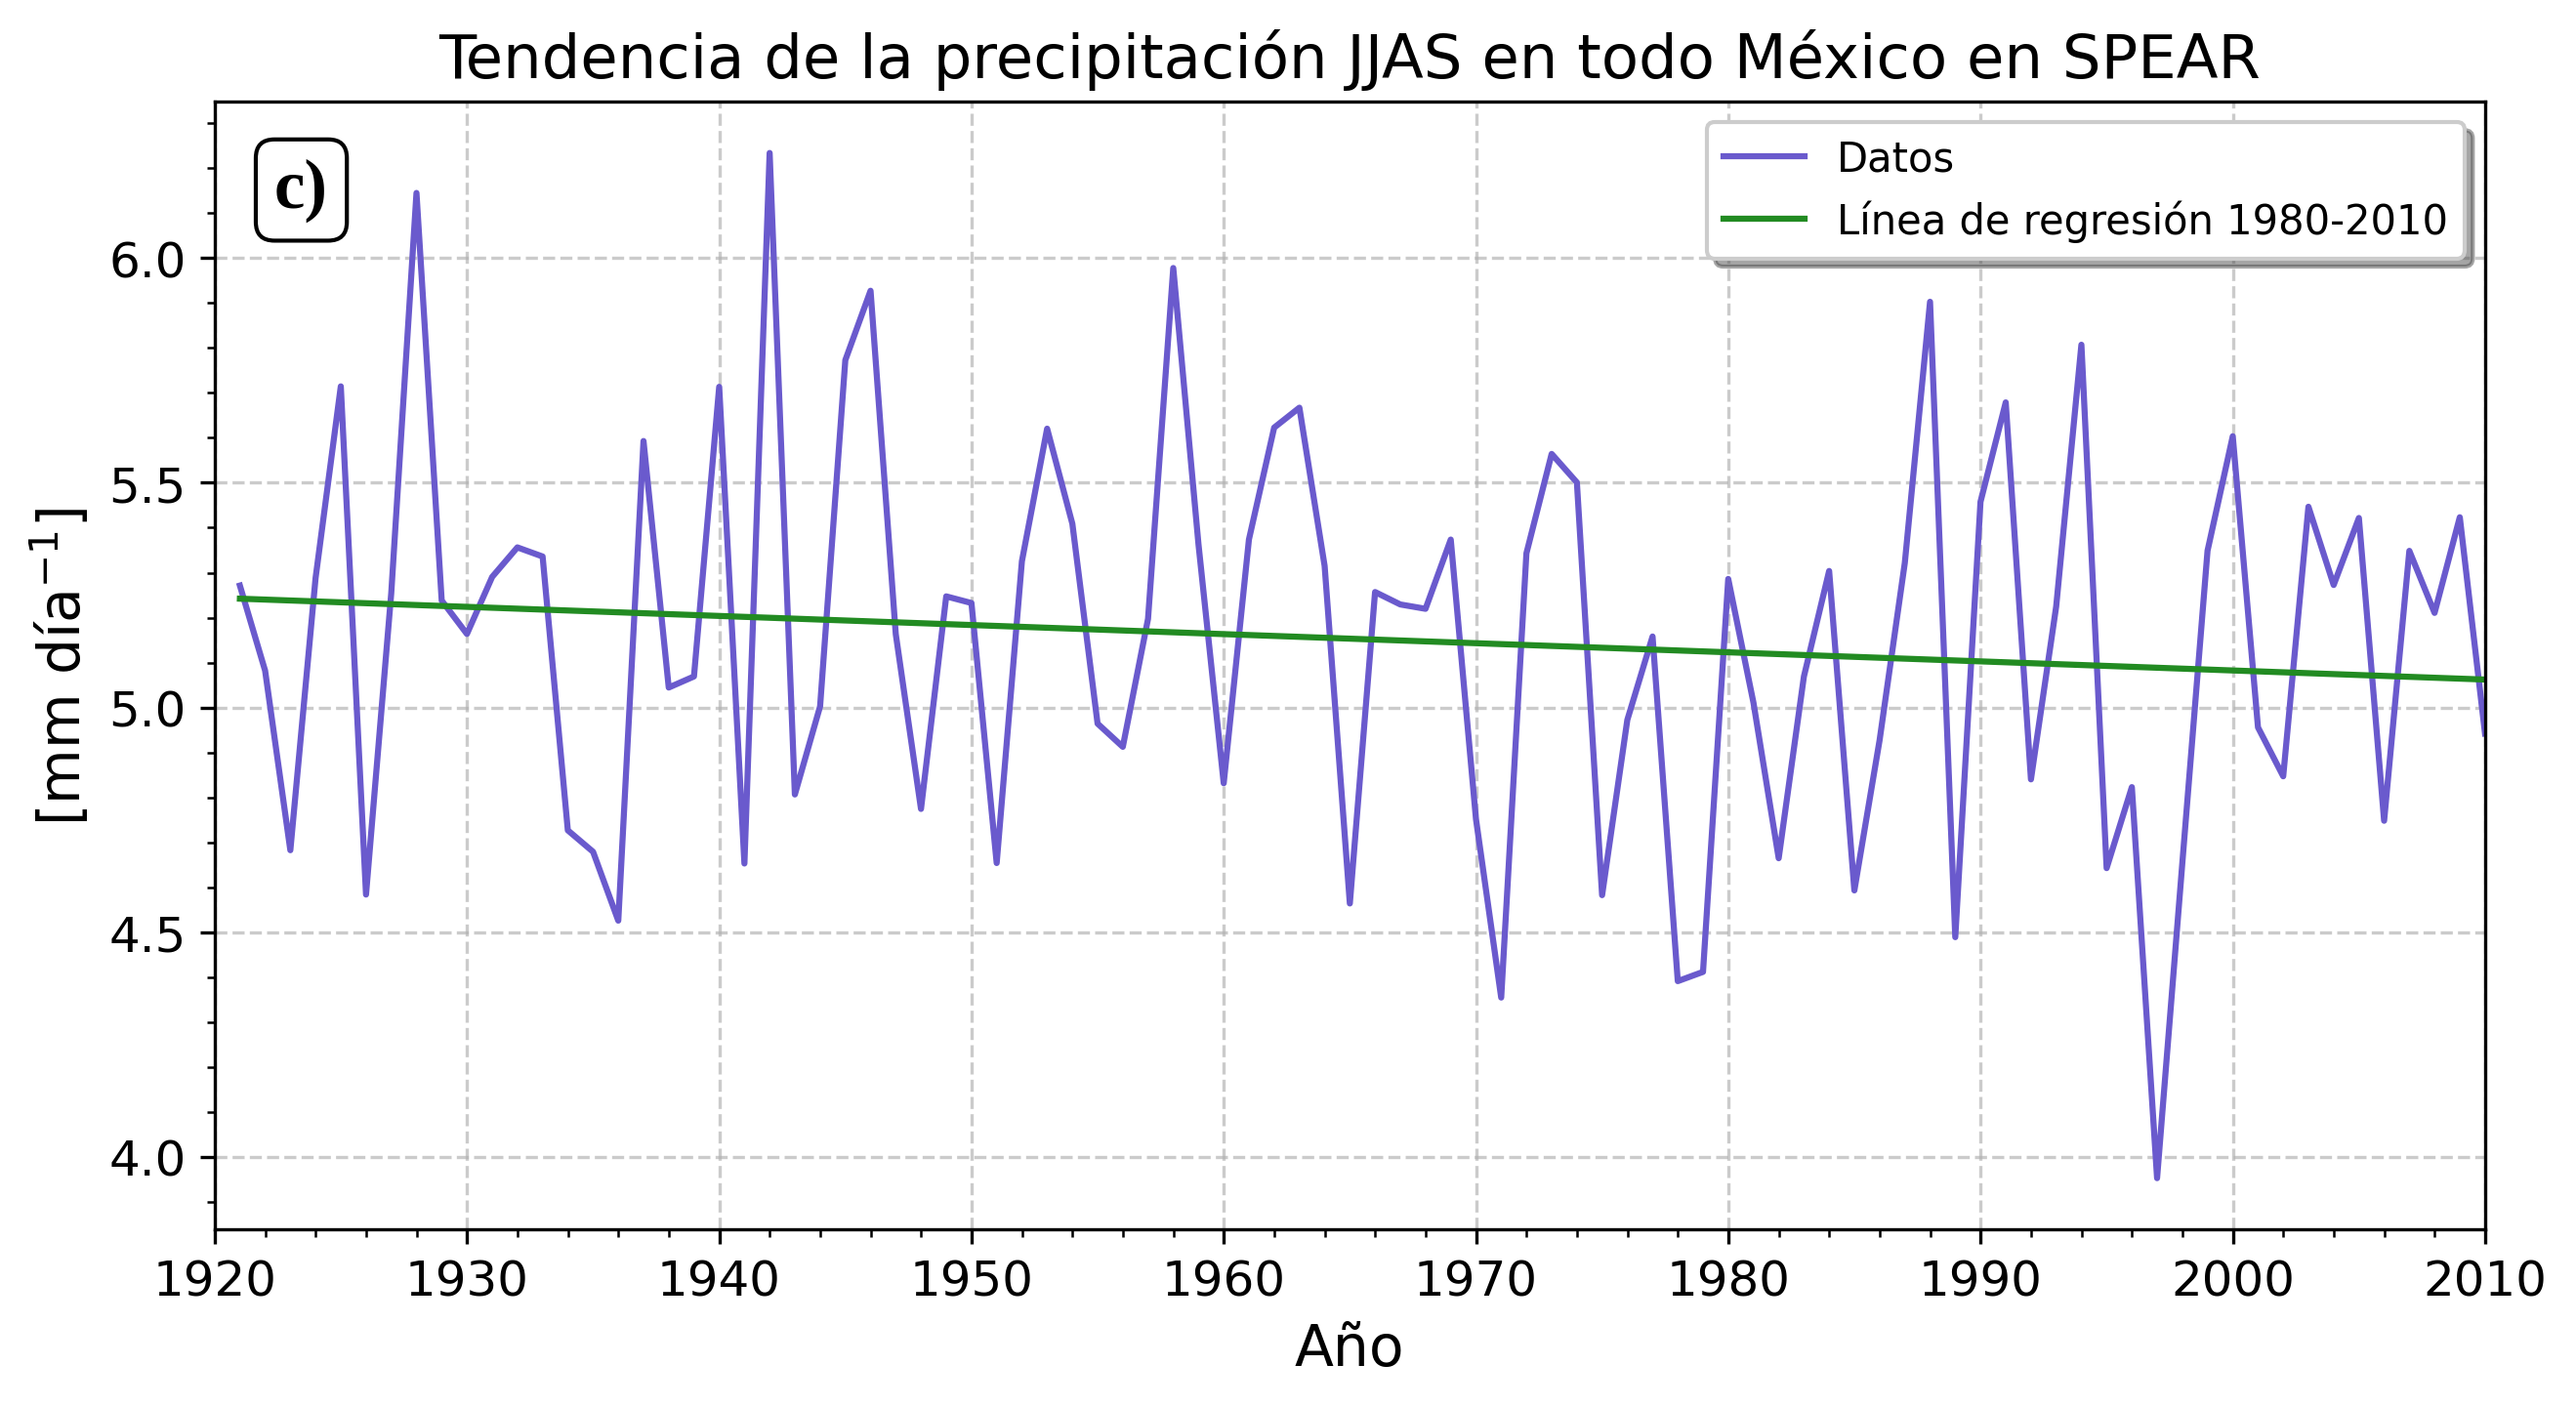

In [29]:
# Graficamos los datos y la línea de regresión
plt.figure(figsize=(10,5), dpi=300)
plt.plot(X, y, color='slateblue', label='Datos')
#plt.plot(X2, y2, color='slateblue', label='Datos')
plt.plot(X, predicciones, color='forestgreen', label='Línea de regresión 1980-2010')
#plt.plot(X2, predicciones2, color='crimson', label='Línea de regresión 1921-2010')
plt.text(0.05, 0.95, 'c)', transform=plt.gca().transAxes, fontsize=17, fontname='Liberation Serif', fontweight='bold', va='top', ha='right',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.27', linewidth=1))
lineplot_setup(1920,2010,'Año','[mm día$^{-1}$]',title='Tendencia de la precipitación JJAS en todo México en SPEAR',legend=True)
ax = plt.gca() 
#ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))  # Intervalo de 0.5 en 0.5

In [30]:
# Dimensiones [lat, lon]
coeficientes_promedio_da = xr.DataArray(coef_promedio_1921, coords={"lat": area_ens.lat, "lon": area_ens.lon}, dims=["lat", "lon"])
coeficientes_promedio_80 = xr.DataArray(coef_promedio_1980, coords={"lat": area_ens.lat, "lon": area_ens.lon}, dims=["lat", "lon"])

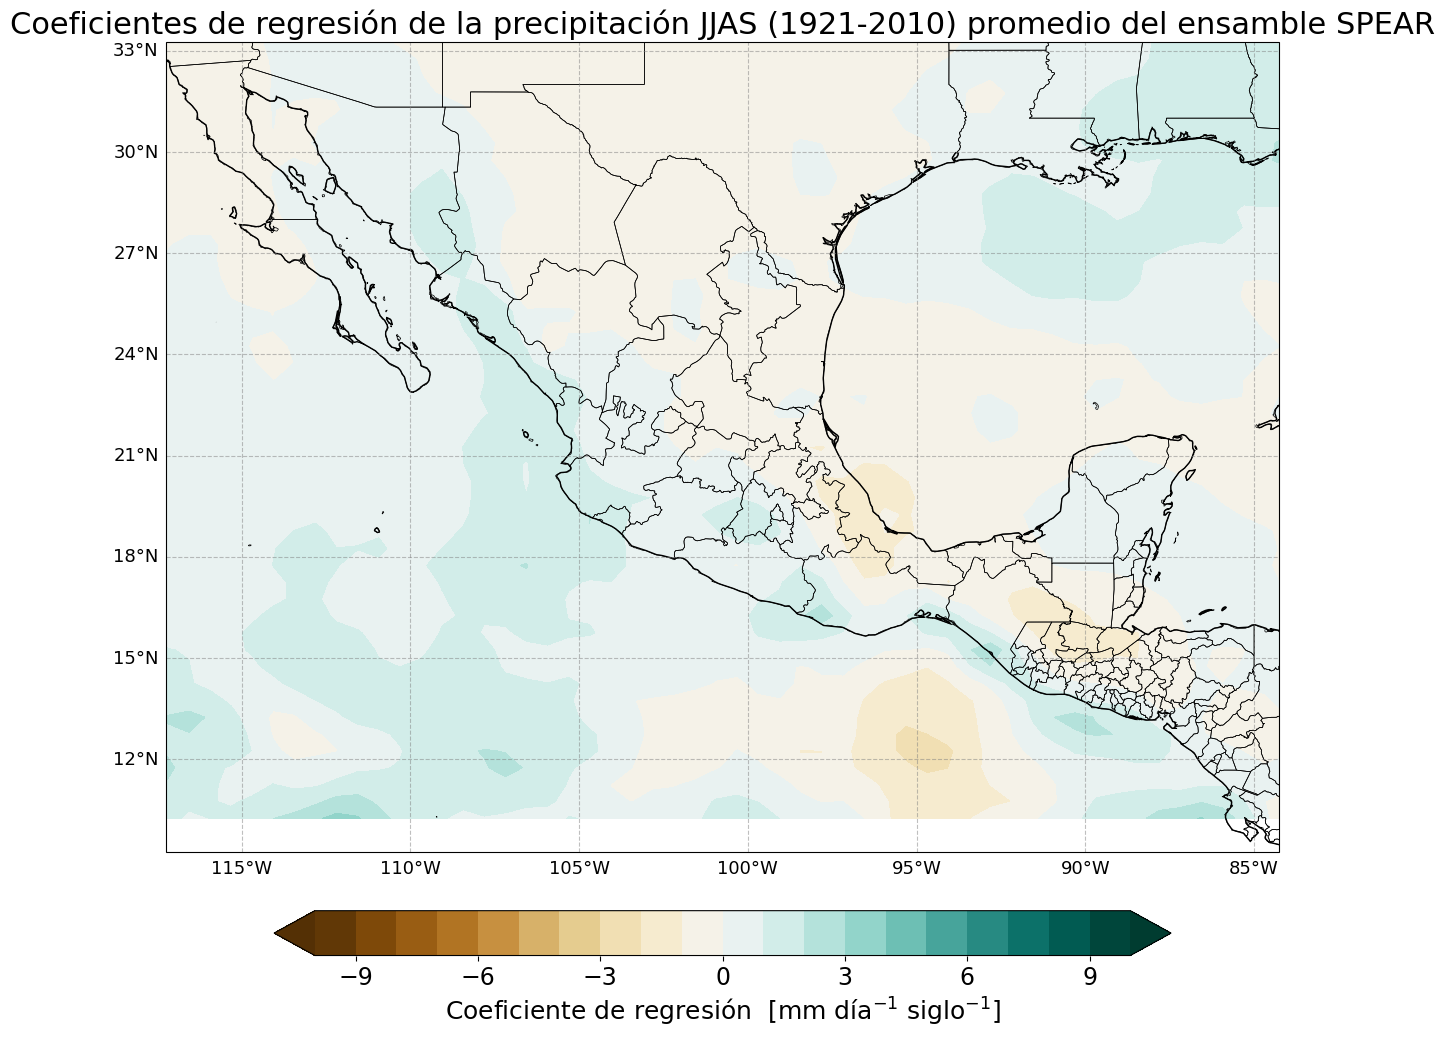

In [31]:
#coef_matriz_m_da2 = xr.DataArray(coeficientes_promedio, coords=[area_ens.lat, area_ens.lon], dims=["lat", "lon"])
#coeficientes_promedio_da.to_netcdf('coeficientes_regresion_SPEAR_80.nc')

levels = np.linspace(-10, 10, 21) 

# Graficamos  
mapa_MC(coeficientes_promedio_80*100, levels, 'BrBG', 'Coeficientes de regresión de la precipitación JJAS (1921-2010) promedio del ensamble SPEAR', 
        extend='both', cbarlabel='Coeficiente de regresión  [mm día$^{-1}$ siglo$^{-1}$]', lon_min=242.75, lon_max=275.75, lat_min=9.25, lat_max=33.25)